In [1]:

import os
import numpy as np
import numpy.linalg as la
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import pyplot as plt
from matplotlib import rc
from explicit_rk import ExplicitRungeKutta, integrators



In [2]:

# program parameters (untested for N_BODIES > 3 or DIMENSION != 2)
N_BODIES = 3
DIMENSION = 2
CHOREOGRAPHY_NUM = "22"
CHOREOGRAPHIES = {
    "2": {"v": np.array([0.322184765624991, 0.647989160156249]), "T": 51.3958},
    "3": {"v": np.array([0.257841699218752, 0.687880761718747]), "T": 55.6431},
    "4": {"v": np.array([0.568991007042164, 0.449428951346711]), "T": 51.9645},
    "22": {"v": np.array([0.698073236083981, 0.328500769042967]), "T": 100.846},
}

# animation parameters
SAVE = False  # if the animation is to be saved as a .mp4 file (rendering might take some time)
DPI = 75 #quality parameters: higher values lead to higher rendering times
BITRATE = 800 #quality parameters: higher values lead to higher rendering times
FPS = None
INTERVAL = 5
EXTRA_ARGS = ["-vcodec", "libx264"]

In [3]:

# simulation parameters

v0s = CHOREOGRAPHIES[CHOREOGRAPHY_NUM]["v"]
y0 = np.array(
    [
        -1,
        0,
        v0s[0],
        v0s[1],
        1,
        0,
        v0s[0],
        v0s[1],
        0,
        0,
        -2 * v0s[0],
        -2 * v0s[1],
    ]
)

h = 0.01
t0 = 0
tf = CHOREOGRAPHIES[CHOREOGRAPHY_NUM]["T"] / 2


In [4]:

# integrator
integrators
rk4 = integrators["RK4"]()


def Fij(ri, rj):
    rel_r = rj - ri
    return (1 / la.norm(rel_r, ord=2) ** 3) * rel_r


def F(t, y):
    _y = np.reshape(y, (N_BODIES, DIMENSION, 2))
    out = np.zeros_like(_y)

    for i, body_state_i in enumerate(_y):
        for j, body_state_j in enumerate(_y):
            if i != j:
                out[i][0] = _y[i][1]
                out[i][1] += Fij(_y[i][0], _y[j][0])
    return out.flatten()



In [5]:

ts, ys = rk4.solve(F, t0, tf, y0, h)

NUM_TS = len(ts)

_ys = ys.reshape((NUM_TS, N_BODIES, 4))

orbit_1 = _ys[:, 0, :2]
orbit_2 = _ys[:, 1, :2]
orbit_3 = _ys[:, 2, :2]

orbits = [orbit_1, orbit_2, orbit_3]


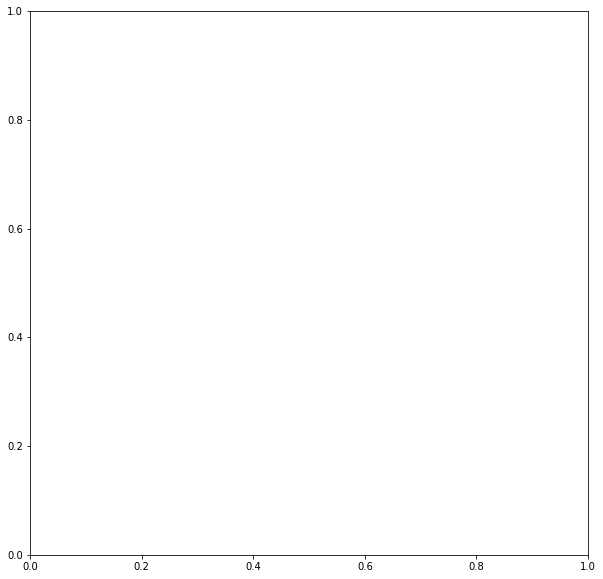

In [6]:

fig, ax = plt.subplots(figsize=(10, 10))



In [7]:
def init_plot():
    ax.set_xlim((-4, 4))
    ax.set_ylim((-4, 4))
    mass1 = ax.plot(
        [],
        [],
        animated=True,
        c="red",
        marker="o",
        markersize=10,
    )
    trail1 = ax.plot(
        [],
        [],
        "--",
        animated=True,
        c="red",
        lw=0.4,
        alpha=0.5,
    )

    mass2 = ax.plot(
        [],
        [],
        animated=True,
        c="green",
        marker="o",
        markersize=10,
    )
    trail2 = ax.plot(
        [],
        [],
        "--",
        animated=True,
        c="green",
        lw=0.4,
        alpha=0.5,
    )

    mass3 = ax.plot(
        [],
        [],
        animated=True,
        c="blue",
        marker="o",
        markersize=10,
    )

    trail3 = ax.plot(
        [],
        [],
        "--",
        animated=True,
        c="blue",
        lw=0.4,
        alpha=0.5,
    )

    return [mass1[0], trail1[0], mass2[0], trail2[0], mass3[0], trail3[0]]

def update(num, orbits, ax):

    for i, orbit in enumerate(orbits):
        mass = ax.lines[2 * i]
        trail = ax.lines[2 * i + 1]
        mass.set_data(orbit[num, 0], orbit[num, 1])
        trail.set_data(orbit[:num, 0], orbit[:num, 1])
    return ax.lines


anim = animation.FuncAnimation(
    fig,
    update,
    init_func=init_plot,
    frames=NUM_TS,
    fargs=(orbits, ax),
    interval=INTERVAL,
    blit=True,
)

In [ ]:
if SAVE == True:
    file_path = os.path.join(
        "outputs", f"3-body-choreography_num{CHOREOGRAPHY_NUM}.mp4"
    )
    anim.save(
        file_path,
        fps=FPS,
        dpi=DPI,
        bitrate=BITRATE,
        extra_args=EXTRA_ARGS,
    )
else:
    rc('animation', html='html5')
    #HTML(anim.to_html5_video())
anim
